<a href="https://colab.research.google.com/github/mcatrinque/phishing_web_detection/blob/main/phising.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#DETECÇÃO DE PHISHING EM WEBSITES

## Importando Bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns

from matplotlib.font_manager import FontProperties
from matplotlib import pyplot

from sklearn import metrics

from matplotlib.font_manager import FontProperties
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz 
from graphviz import render 

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression


from sklearn.preprocessing import LabelEncoder

## Carregando a Base de Dados

In [ ]:
#https://drive.google.com/file/d/1peH2UqJvGoGLPCQ-rAZu9qnKKmIV4tI3/view?usp=sharing
!gdown --id "1peH2UqJvGoGLPCQ-rAZu9qnKKmIV4tI3"

Downloading...
From: https://drive.google.com/uc?id=1peH2UqJvGoGLPCQ-rAZu9qnKKmIV4tI3
To: /content/dataset_urls.csv
100% 855k/855k [00:00<00:00, 102MB/s]


In [ ]:
df = pd.read_csv('/content/dataset_urls.csv', sep=",")
df = df.drop('index', axis=1)

#Explorando a base de dados

In [ ]:
df.head()

,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,port,HTTPS_token,Request_URL,URL_of_Anchor,Links_in_tags,SFH,Submitting_to_email,Abnormal_URL,Redirect,on_mouseover,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,1,-1,1,-1,1,-1,-1,-1,0,1,1,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,1,-1,1,0,-1,-1,1,1,0,1,1,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,1,-1,1,0,-1,-1,-1,-1,0,1,1,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,1,-1,-1,0,0,-1,1,1,0,1,1,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,1,1,1,0,0,-1,1,1,0,-1,1,-1,1,-1,-1,0,-1,1,1,1,1


In [ ]:
df.count()

having_IPhaving_IP_Address     11055
URLURL_Length                  11055
Shortining_Service             11055
having_At_Symbol               11055
double_slash_redirecting       11055
Prefix_Suffix                  11055
having_Sub_Domain              11055
SSLfinal_State                 11055
Domain_registeration_length    11055
Favicon                        11055
port                           11055
HTTPS_token                    11055
Request_URL                    11055
URL_of_Anchor                  11055
Links_in_tags                  11055
SFH                            11055
Submitting_to_email            11055
Abnormal_URL                   11055
Redirect                       11055
on_mouseover                   11055
RightClick                     11055
popUpWidnow                    11055
Iframe                         11055
age_of_domain                  11055
DNSRecord                      11055
web_traffic                    11055
Page_Rank                      11055
G

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   having_IPhaving_IP_Address   11055 non-null  int64
 1   URLURL_Length                11055 non-null  int64
 2   Shortining_Service           11055 non-null  int64
 3   having_At_Symbol             11055 non-null  int64
 4   double_slash_redirecting     11055 non-null  int64
 5   Prefix_Suffix                11055 non-null  int64
 6   having_Sub_Domain            11055 non-null  int64
 7   SSLfinal_State               11055 non-null  int64
 8   Domain_registeration_length  11055 non-null  int64
 9   Favicon                      11055 non-null  int64
 10  port                         11055 non-null  int64
 11  HTTPS_token                  11055 non-null  int64
 12  Request_URL                  11055 non-null  int64
 13  URL_of_Anchor                11055 non-null  i

##Avaliando ocorrências de Phishing

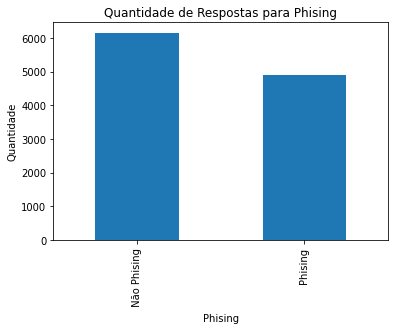

In [ ]:
df.Result.copy().value_counts().plot.bar()
plt.title('Quantidade de Respostas para Phising')
plt.xlabel('Phising')
plt.ylabel('Quantidade')
plt.xticks([0,1],[' Não Phising','Phising'])
plt.show()

##Avaliando Métricas


In [ ]:
df.describe()

,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,port,HTTPS_token,Request_URL,URL_of_Anchor,Links_in_tags,SFH,Submitting_to_email,Abnormal_URL,Redirect,on_mouseover,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
count,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000
mean,0.313795,-0.633198,0.738761,0.700588,0.741474,-0.734962,0.063953,0.250927,-0.336771,0.628584,0.728268,0.675079,0.186793,-0.076526,-0.118137,-0.595749,0.635640,0.705292,0.115694,0.762099,0.913885,0.613388,0.816915,0.061239,0.377114,0.287291,-0.483673,0.721574,0.344007,0.719584,0.113885
std,0.949534,0.766095,0.673998,0.713598,0.671011,0.678139,0.817518,0.911892,0.941629,0.777777,0.685324,0.737779,0.982444,0.715138,0.763973,0.759143,0.772021,0.708949,0.319872,0.647490,0.405991,0.789818,0.576784,0.998168,0.926209,0.827733,0.875289,0.692369,0.569944,0.694437,0.993539
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,0.000000,-1.000000,1.000000,0.000000,1.000000,-1.000000
50%,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,0.000000,1.000000,1.000000
75%,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##Analisando as Correlações

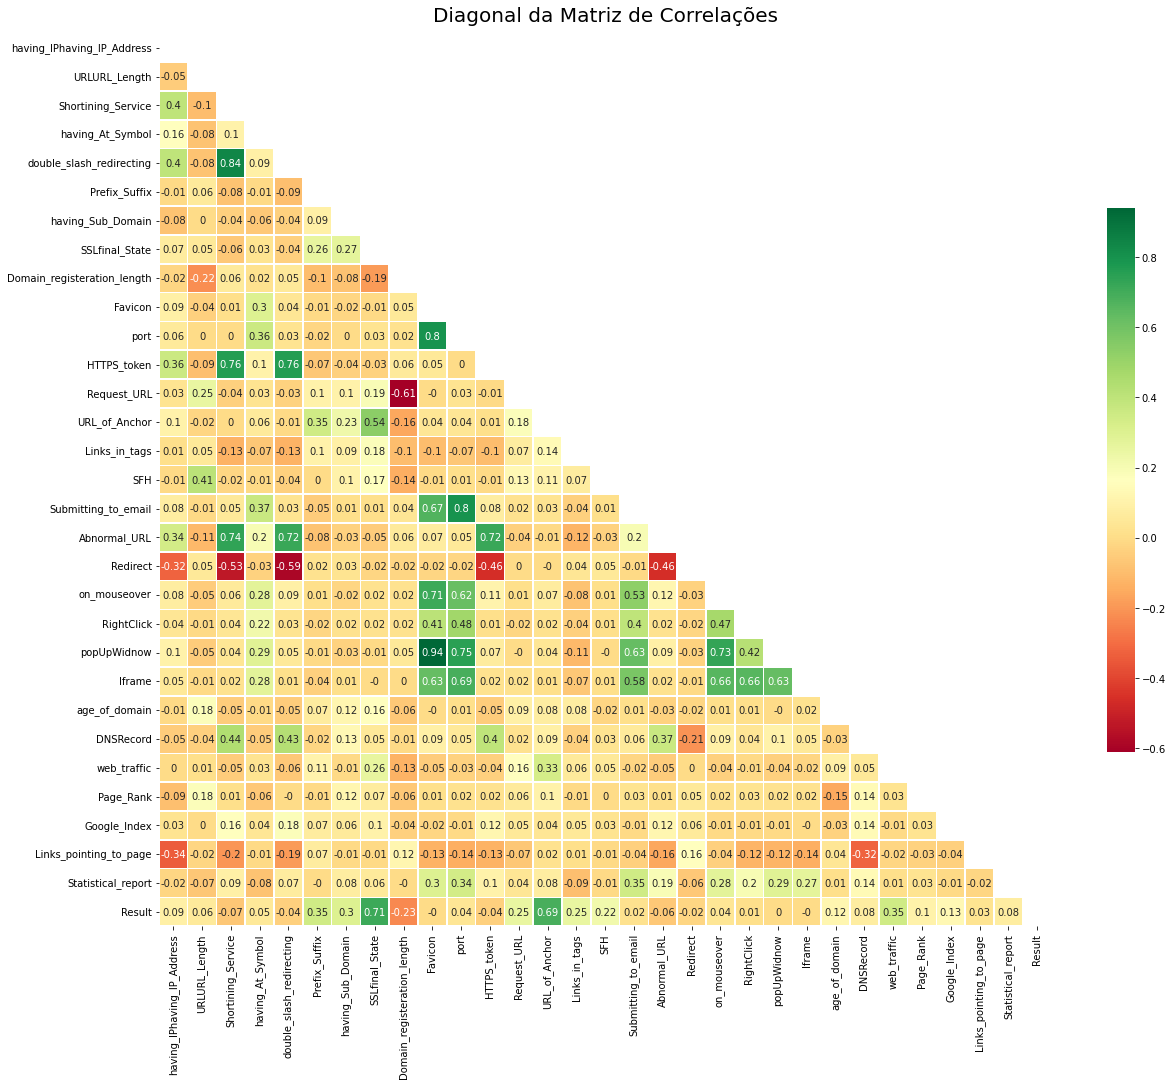

In [ ]:
corrmat = df.corr('pearson')
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
correlacao = round(df[top_corr_features].corr('pearson'),2)
mask = np.triu(np.ones_like(correlacao, dtype=bool))
heatmap = sns.heatmap(correlacao,mask=mask,annot=True,cmap="RdYlGn", square=True, linewidths=.5, cbar_kws={"shrink": .5})
heatmap.set_title('Diagonal da Matriz de Correlações', fontdict={'fontsize':20}, pad=12);
plt.show()

#Modelagem de Dados

In [ ]:
acuracia = pd.DataFrame(columns=['Features','RandomForest', 'KNN', 'DecisionTree', 'LogisticRegression'])


## Modelo criado a partir de todas as Features do Dataset

In [ ]:
y = df['Result'].copy()

In [ ]:
X = df.copy()
X = X.drop('Result', axis=1)
X.head()

,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,port,HTTPS_token,Request_URL,URL_of_Anchor,Links_in_tags,SFH,Submitting_to_email,Abnormal_URL,Redirect,on_mouseover,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report
0,-1,1,1,1,-1,-1,-1,-1,-1,1,1,-1,1,-1,1,-1,-1,-1,0,1,1,1,1,-1,-1,-1,-1,1,1,-1
1,1,1,1,1,1,-1,0,1,-1,1,1,-1,1,0,-1,-1,1,1,0,1,1,1,1,-1,-1,0,-1,1,1,1
2,1,0,1,1,1,-1,-1,-1,-1,1,1,-1,1,0,-1,-1,-1,-1,0,1,1,1,1,1,-1,1,-1,1,0,-1
3,1,0,1,1,1,-1,-1,-1,1,1,1,-1,-1,0,0,-1,1,1,0,1,1,1,1,-1,-1,1,-1,1,-1,1
4,1,0,-1,1,1,-1,1,1,-1,1,1,1,1,0,0,-1,1,1,0,-1,1,-1,1,-1,-1,0,-1,1,1,1


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
classificador=RandomForestClassifier(n_estimators=500)
classificador.fit(X_train,y_train)
y_pred=classificador.predict(X_test)
acuracia_RF = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:",acuracia_RF)

Accuracy: 0.968947844437745


In [ ]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
acuracia_KNN = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:",acuracia_KNN)

Accuracy: 0.9279469400060295


In [ ]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
acuracia_DT = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:",acuracia_DT)

Accuracy: 0.9662345492915285


In [ ]:
logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)
acuracia_LR = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:",acuracia_LR)

Accuracy: 0.9228218269520652


In [ ]:
acuracia = acuracia.append({'Features':len(df.columns)-1,'RandomForest':acuracia_RF, 'KNN':acuracia_KNN, 'DecisionTree':acuracia_DT, 'LogisticRegression':acuracia_LR}, ignore_index=True)

## Seleção de Features

In [ ]:
def selectedFeatures(data_result, corr_value):
  for i in range(correlacao['Result'].size-1):
    if correlacao['Result'][i] > corr_value or correlacao['Result'][i] < -corr_value:
      data_result.append(correlacao['Result'].index[i])
  print(data_result)

### Modelo criado a partir de todas as Features com correlação maior que 0

In [ ]:
data_result = []
selectedFeatures(data_result, 0)

['having_IPhaving_IP_Address', 'URLURL_Length', 'Shortining_Service', 'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix', 'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length', 'port', 'HTTPS_token', 'Request_URL', 'URL_of_Anchor', 'Links_in_tags', 'SFH', 'Submitting_to_email', 'Abnormal_URL', 'Redirect', 'on_mouseover', 'RightClick', 'age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank', 'Google_Index', 'Links_pointing_to_page', 'Statistical_report']


In [ ]:
print("Numero de Features do Dataset:", len(df.columns)-1)
print("Numero de Features Selecionadas:", len(data_result))

Numero de Features do Dataset: 30
Numero de Features Selecionadas: 27


In [ ]:
X = df[data_result].copy()
X.head()

,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,port,HTTPS_token,Request_URL,URL_of_Anchor,Links_in_tags,SFH,Submitting_to_email,Abnormal_URL,Redirect,on_mouseover,RightClick,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report
0,-1,1,1,1,-1,-1,-1,-1,-1,1,-1,1,-1,1,-1,-1,-1,0,1,1,-1,-1,-1,-1,1,1,-1
1,1,1,1,1,1,-1,0,1,-1,1,-1,1,0,-1,-1,1,1,0,1,1,-1,-1,0,-1,1,1,1
2,1,0,1,1,1,-1,-1,-1,-1,1,-1,1,0,-1,-1,-1,-1,0,1,1,1,-1,1,-1,1,0,-1
3,1,0,1,1,1,-1,-1,-1,1,1,-1,-1,0,0,-1,1,1,0,1,1,-1,-1,1,-1,1,-1,1
4,1,0,-1,1,1,-1,1,1,-1,1,1,1,0,0,-1,1,1,0,-1,1,-1,-1,0,-1,1,1,1


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
classificador=RandomForestClassifier(n_estimators=500)
classificador.fit(X_train,y_train)
y_pred=classificador.predict(X_test)
acuracia_RF = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:",acuracia_RF)

Accuracy: 0.9701537533916189


In [ ]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
acuracia_KNN = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:",acuracia_KNN)

Accuracy: 0.9375942116370214


In [ ]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
acuracia_DT = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:",acuracia_DT)

Accuracy: 0.9662345492915285


In [ ]:
logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)
acuracia_LR = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:",acuracia_LR)

Accuracy: 0.9288513717214351


In [ ]:
acuracia = acuracia.append({'Features':len(data_result),'RandomForest':acuracia_RF, 'KNN':acuracia_KNN, 'DecisionTree':acuracia_DT, 'LogisticRegression':acuracia_LR}, ignore_index=True)

### Modelo criado a partir de todas as Features com correlação maior ou menor  que 0.2

In [ ]:
data_result = []
selectedFeatures(data_result, 0.2)

['Prefix_Suffix', 'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length', 'Request_URL', 'URL_of_Anchor', 'Links_in_tags', 'SFH', 'web_traffic']


In [ ]:
print("Numero de Features do Dataset:", len(df.columns)-1)
print("Numero de Features Selecionadas:", len(data_result))

Numero de Features do Dataset: 30
Numero de Features Selecionadas: 9


In [ ]:
X = df[data_result].copy()
X.head()

,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Request_URL,URL_of_Anchor,Links_in_tags,SFH,web_traffic
0,-1,-1,-1,-1,1,-1,1,-1,-1
1,-1,0,1,-1,1,0,-1,-1,0
2,-1,-1,-1,-1,1,0,-1,-1,1
3,-1,-1,-1,1,-1,0,0,-1,1
4,-1,1,1,-1,1,0,0,-1,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
classificador=RandomForestClassifier(n_estimators=500)
classificador.fit(X_train,y_train)
y_pred=classificador.predict(X_test)
acuracia_RF = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:",acuracia_RF)

Accuracy: 0.9345794392523364


In [ ]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
acuracia_KNN = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:",acuracia_KNN)

Accuracy: 0.9252336448598131


In [ ]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
acuracia_DT = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:",acuracia_DT)

Accuracy: 0.9333735302984625


In [ ]:
logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))
acuracia_LR = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:",acuracia_LR)

Accuracy:  0.9104612601748568
Accuracy: 0.9104612601748568


In [ ]:
acuracia = acuracia.append({'Features':len(data_result),'RandomForest':acuracia_RF, 'KNN':acuracia_KNN, 'DecisionTree':acuracia_DT, 'LogisticRegression':acuracia_LR}, ignore_index=True)

### Modelo criado a partir de todas as Features com correlação maior ou menor  que 0.3

In [ ]:
data_result = []
selectedFeatures(data_result, 0.3)

['Prefix_Suffix', 'SSLfinal_State', 'URL_of_Anchor', 'web_traffic']


In [ ]:
print("Numero de Features do Dataset:", len(df.columns)-1)
print("Numero de Features Selecionadas:", len(data_result))

Numero de Features do Dataset: 30
Numero de Features Selecionadas: 4


In [ ]:
X = df[data_result].copy()
X.head()

,Prefix_Suffix,SSLfinal_State,URL_of_Anchor,web_traffic
0,-1,-1,-1,-1
1,-1,1,0,0
2,-1,-1,0,1
3,-1,-1,0,1
4,-1,1,0,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
classificador=RandomForestClassifier(n_estimators=500)
classificador.fit(X_train,y_train)
y_pred=classificador.predict(X_test)
acuracia_RF = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:",acuracia_RF)

Accuracy: 0.9267410310521556


In [ ]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
acuracia_KNN = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:",acuracia_KNN)

Accuracy: 0.9098583056979198


In [ ]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9267410310521556


In [ ]:
logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))
acuracia_LR = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:",acuracia_LR)

Accuracy:  0.9104612601748568
Accuracy: 0.9104612601748568


In [ ]:
acuracia = acuracia.append({'Features':len(data_result),'RandomForest':acuracia_RF, 'KNN':acuracia_KNN, 'DecisionTree':acuracia_DT, 'LogisticRegression':acuracia_LR}, ignore_index=True)
acuracia

,Features,RandomForest,KNN,DecisionTree,LogisticRegression
0,30.0,0.968948,0.927947,0.966235,0.922822
1,27.0,0.970154,0.937594,0.966235,0.928851
2,9.0,0.934579,0.925234,0.933374,0.910461
3,4.0,0.926741,0.909858,0.933374,0.910461


#Avaliação de Acurácia

In [ ]:
acuracia = acuracia.set_index('Features')
acuracia.index.name = None
acuracia

,RandomForest,KNN,DecisionTree,LogisticRegression
30.0,0.968948,0.927947,0.966235,0.922822
27.0,0.970154,0.937594,0.966235,0.928851
9.0,0.934579,0.925234,0.933374,0.910461
4.0,0.926741,0.909858,0.933374,0.910461


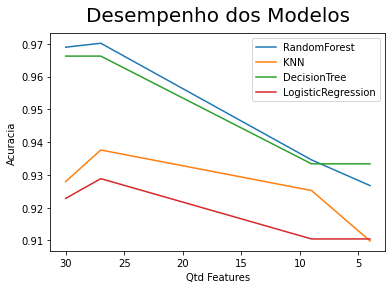

In [ ]:
ax = acuracia.plot()
ax.set_xlim(ax.get_xlim()[::-1])
plt.title('Desempenho dos Modelos', fontdict={'fontsize':20}, pad=12)
plt.xlabel('Qtd Features')
plt.ylabel('Acuracia')
plt.show()